# Import Libraries

In [2]:
from sklearn.datasets import fetch_california_housing
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Get Data

In [4]:
housing = fetch_california_housing()

In [32]:
x_train_full,x_test,y_train_full,y_test = train_test_split(housing.data,housing.target,random_state=42 )

In [33]:
x_train,x_valid,y_train,y_valid=train_test_split(x_train_full,y_train_full,random_state=42)

In [34]:
tf.random.set_seed(42)
norm_layer=tf.keras.layers.Normalization(input_shape=x_train.shape[1:])

**Using the sequential API to build, train, evaluate, and use a regression MLP is quite similar to what we did for classification. The main differences in the following code example are the fact that the output layer has a single neuron (since we only want to predict a single value) and it uses no activation function, the loss function is the mean squared error, the metric is the RMSE, and we’re using an Adam optimizer like Scikit-Learn’s MLPRegressor did. Moreover, in this example we don’t need a Flatten laye** 

# Model

In [35]:
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [36]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)


In [37]:
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])


**nstead we’re using a Normalization layer as the first layer: it does the same thing as Scikit-Learn’s StandardScaler, but it must be fitted to the training data using its adapt() method before you call the model’s fit() method. (Keras has other preprocessing layers** 

In [38]:
norm_layer.adapt(x_train)


In [39]:
history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8268 - root_mean_squared_error: 0.9093 - val_loss: 0.3917 - val_root_mean_squared_error: 0.6258
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3703 - root_mean_squared_error: 0.6086 - val_loss: 1.0676 - val_root_mean_squared_error: 1.0332
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3670 - root_mean_squared_error: 0.6058 - val_loss: 0.4419 - val_root_mean_squared_error: 0.6648
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3431 - root_mean_squared_error: 0.5858 - val_loss: 0.6116 - val_root_mean_squared_error: 0.7821
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3332 - root_mean_squared_error: 0.5773 - val_loss: 1.5508 - val_root_mean_squared_error: 1.2453
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3419 - root_mean_squared_error: 0.5847 - val_loss: 0.7596 - val_

In [40]:
mse_test, rmse_test = model.evaluate(x_test, y_test)
X_new = x_test[:3]
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 84ms/step


#  visualizations

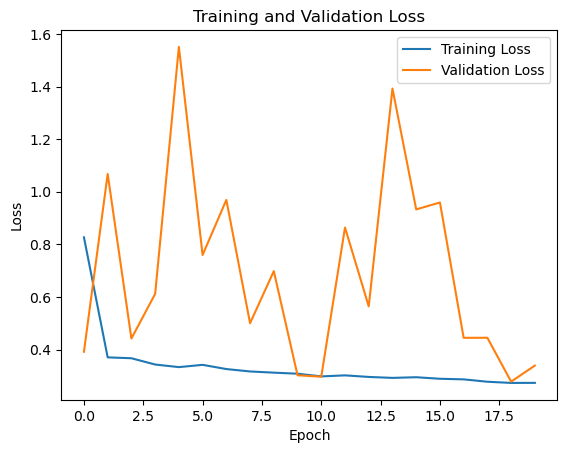

In [41]:
import matplotlib.pyplot as plt
# Plot training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

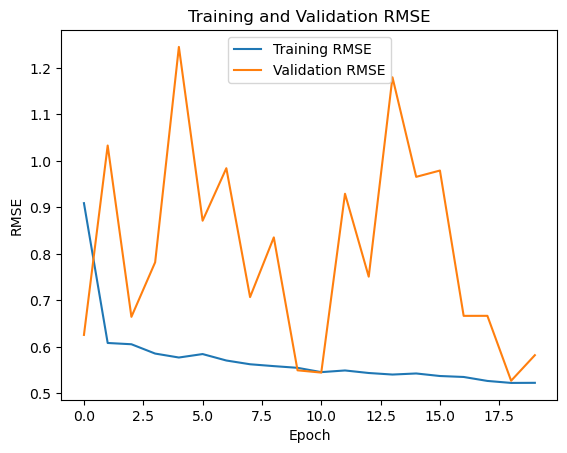

In [43]:
# Plot training RMSE and validation RMSE
plt.plot(history.history['root_mean_squared_error'], label='Training RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.title('Training and Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()
